 # **LAB 7**
# Random Walk

In [45]:
import math
import numpy as np
from random import random, choice, uniform
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# ------------------------------- 1


In [113]:
def randomWalk(N, p, l):
    dist = 0
    # yield 0
    for i in range(N):
        step = 1 if uniform(0,1) > p else -1
        dist += (step * l)
        yield dist
    yield abs(dist)

In [115]:
def experiment(N, p, l, trials):
    results = []
    for i in range(trials):
        results.append(list(randomWalk(N, p, l)))
    results = np.array(results)
    # print(results.shape)
    mean = np.mean(results, axis = 0)
    var = np.var(results, axis = 0)
    return mean, var

(A) Avg dist vs time

In [117]:
exp1 = experiment(25, 0.5, 1, 50)
meanDist = exp1[0][-1]
var = exp1[1][-1]
print(meanDist, "\u00B1", var)

4.2 ± 8.639999999999997


In [118]:
p = 0.5
trials = [10, 100, 1000, 10000]
Ns = range(1, 101)
l = 1

In [148]:
distances = []
variances = []
positions = []
for trial in trials:
    distance, pos, variance = zip(*[(exp[0][-1], exp[0][-2], exp[1][-2]) for exp in [experiment(N, p, l, trial) for N in Ns]])
    distances.append(distance)
    variances.append(variance)
    positions.append(pos)

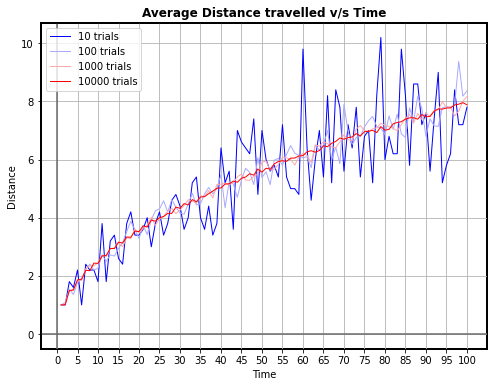

In [149]:
fig, ax = plt.subplots(figsize = (8,6))
color = iter(cm.bwr(np.linspace(0, 1, len(trials))))

for i in range(len(trials)):
    ax.plot(Ns, distances[i], label = f"{trials[i]} trials", color = next(color), lw = 1)
    
ax.set_title(f"Average Distance travelled v/s Time", fontweight = 'bold')
ax.set_xlabel(f"Time")
ax.set_ylabel(f"Distance")
ax.set_xticks(range(0,len(Ns)+1,5))

ax.axhline(0, color='dimgrey')
ax.axvline(0, color='dimgrey')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(2)
ax.grid()
ax.legend()
plt.show(fig)

In [150]:
import statistics as stats
for distance in distances:
    print(stats.correlation(Ns, distance))

0.8295390086832992
0.9661722360718802
0.9793139180220787
0.9812649638778643


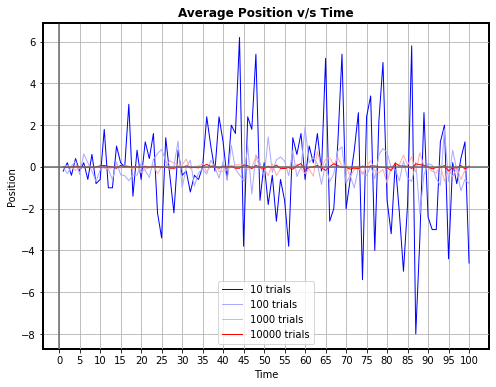

In [151]:
fig, ax = plt.subplots(figsize = (8,6))
color = iter(cm.bwr(np.linspace(0, 1, len(trials))))

for i in range(len(trials)):
    ax.plot(Ns, positions[i], label = f"{trials[i]} trials", color = next(color), lw = 1)
    
ax.set_title(f"Average Position v/s Time", fontweight = 'bold')
ax.set_xlabel(f"Time")
ax.set_ylabel(f"Position")
ax.set_xticks(range(0,len(Ns)+1,5))

ax.axhline(0, color='dimgrey')
ax.axvline(0, color='dimgrey')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(2)
ax.grid()
ax.legend()
plt.show(fig)

---

(B) Variance v/s time

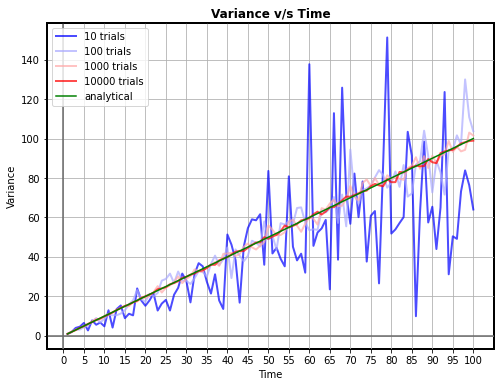

In [152]:
fig, ax = plt.subplots(figsize = (8,6))
color = iter(cm.bwr(np.linspace(0, 1, len(trials))))

for i in range(len(trials)):
    ax.plot(Ns, variances[i], label = f"{trials[i]} trials", color = next(color), lw = 2, alpha = 0.7)
ax.plot(Ns, [n*l**2 for n in Ns], label = 'analytical', color = 'green', lw = 1.5)
ax.set_title(f"Variance v/s Time", fontweight = 'bold')
ax.set_xlabel(f"Time")
ax.set_ylabel(f"Variance")
ax.set_xticks(range(0,len(Ns)+1,5))

ax.axhline(0, color='dimgrey')
ax.axvline(0, color='dimgrey')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth(2)
ax.grid()
ax.legend()
plt.show(fig)

In [153]:
for variance in variances:
    print(stats.correlation(Ns, variance))

0.7140142189516956
0.973682957520343
0.9969633269806396
0.99960962565678


(C) Histogram of the final position

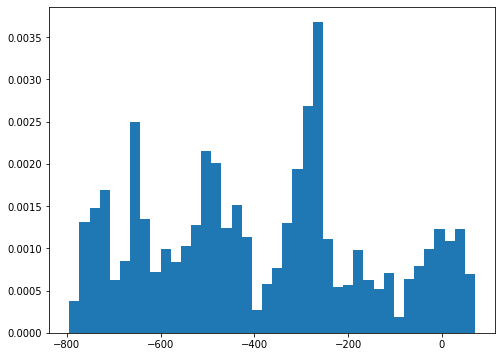

In [192]:
exp1 = randomWalk(100000, 0.5, 1)
positions = list(exp1)[:-1]
# print(len(positions))
plt.figure(figsize = (8,6))
plt.hist(positions, bins = 40, density = True)
plt.show()

In [187]:
exp2 = experiment(100, 0.5, 1, 100)
positions = exp2[0][:-1]

[-0.1  -0.16 -0.12  0.1   0.18  0.12  0.26  0.3   0.28  0.3  -0.04 -0.02
 -0.12 -0.3  -0.34 -0.32 -0.36 -0.38 -0.34 -0.28 -0.16 -0.22 -0.3  -0.34
 -0.36 -0.42 -0.36 -0.32 -0.2  -0.22 -0.26 -0.28 -0.26 -0.5  -0.58 -0.74
 -0.8  -0.92 -0.88 -1.04 -1.1  -1.04 -0.92 -0.9  -0.74 -0.66 -0.58 -0.74
 -0.68 -0.62 -0.42 -0.38 -0.3  -0.38 -0.44 -0.4  -0.56 -0.64 -0.52 -0.5
 -0.44 -0.42 -0.32 -0.26 -0.2  -0.18 -0.18 -0.18 -0.3  -0.26 -0.28 -0.3
 -0.14  0.    0.16  0.18  0.12  0.28  0.26  0.36  0.52  0.58  0.6   0.58
  0.56  0.56  0.72  0.86  0.88  0.78  0.92  0.76  0.78  0.86  0.88  0.96
  0.9   0.94  0.88  0.74]


---

In [ ]:
def randomWalk2(N, p, l):
    walk = 0
    pos = []
    for i in range(N):
        step = np.random.rand()
        if(step<=p):
            walk += l
        else:
            walk -= l
        pos += [walk]
    return abs(walk), pos

In [ ]:
randomWalk2(10, 0.5, 1)

(0, [-1, 0, 1, 0, 1, 0, -1, -2, -1, 0])

# ------------------------------- 2
